## Babynames dataset
#### The United States Social Security Administration (SSA) has made available data on the frequency of baby names from 1880 through 2010. Hadley Wickham, an author of several popular R packages, has often made use of this dataset in illustrating data manipulation in R.



In [1]:
import pandas as pd
import json

In [2]:
path = '/Users/hunghoang/Documents/Programming/myPython /Python-for-Data-Analysis/pydata-book-2nd-edition/datasets/babynames/'

pieces = []
columns = ['name', 'sex', 'births']
years = range(1880,2011)
for year in years:
    complete_path = path+'yob%d.txt' % year
    frame = pd.read_csv(complete_path, names=columns)

    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)


In [3]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


## Total births by sex over the period

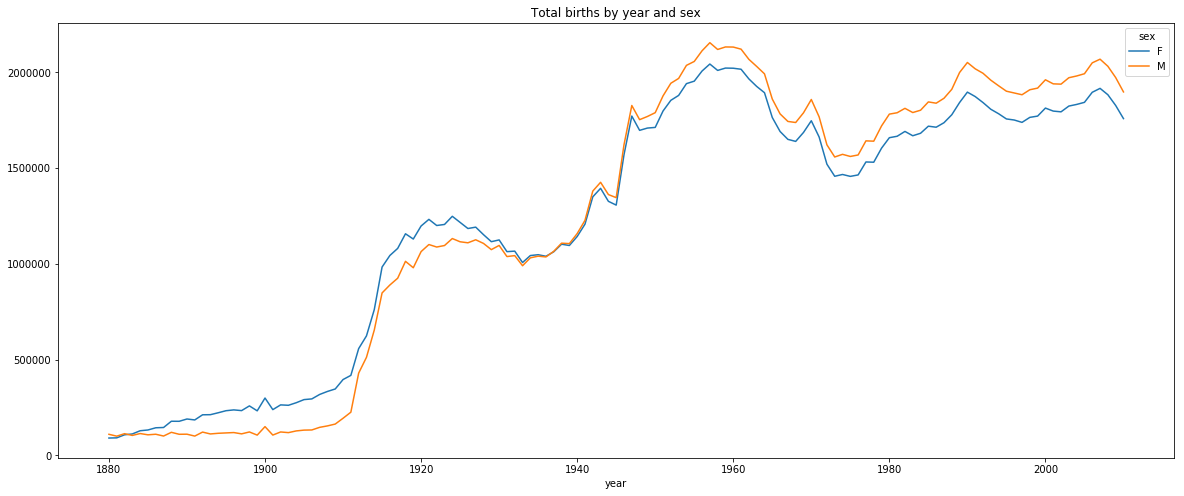

In [5]:

names.pivot_table('births',index='year',columns='sex',aggfunc='sum').plot(title='Total births by year and sex', figsize=(20,8))


## To extract a subset of the dataset, says top 1000 popular names for each sex/year combination

In [6]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
top1000 = names.groupby(['year','sex']).apply(get_top1000)
top1000.reset_index(inplace=True,drop=True)

In [7]:
top1000

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


## splitting top 1000 dataset into boys and girls

In [7]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [8]:
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc='sum')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x122bad550>,
      dtype=object)

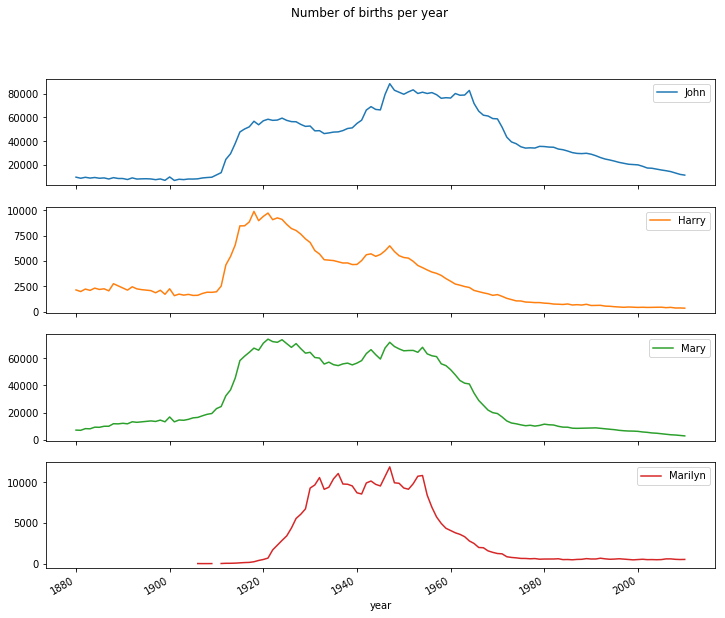

In [9]:
subset_old = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset_old.plot(subplots=True, figsize=(12, 10), grid=False,title="Number of births per year")

#### John, Harry, Mary and Marilyn are very popular names and these was out of favor in the end of 20th century

In [10]:
boys[boys.year==2010]

,name,sex,births,year
260877,Jacob,M,21875,2010
260878,Ethan,M,17866,2010
260879,Michael,M,17133,2010
260880,Jayden,M,17030,2010
260881,William,M,16870,2010
260882,Alexander,M,16634,2010
260883,Noah,M,16281,2010
260884,Daniel,M,15679,2010
260885,Aiden,M,15403,2010
260886,Anthony,M,15364,2010


In [11]:
girls[girls.year==2010]

,name,sex,births,year
259877,Isabella,F,22731,2010
259878,Sophia,F,20477,2010
259879,Emma,F,17179,2010
259880,Olivia,F,16860,2010
259881,Ava,F,15300,2010
259882,Emily,F,14172,2010
259883,Abigail,F,14124,2010
259884,Madison,F,13070,2010
259885,Chloe,F,11656,2010
259886,Mia,F,10541,2010


#### I intuitively pick 4 modern names and see how popular they are

array([<matplotlib.axes._subplots.AxesSubplot object at 0x120d77e80>,
      dtype=object)

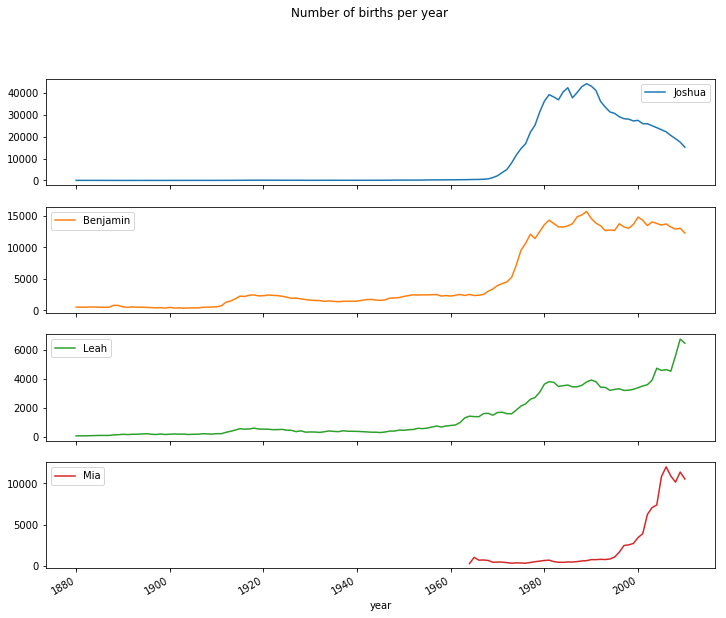

In [12]:
subset_modern = total_births[['Joshua','Benjamin','Leah','Mia']]
subset_modern.plot(subplots=True,grid=False, title='Number of births per year', figsize=(12,10))

In [13]:
# extract last letter from name column
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births', index=last_letters,
                          columns=['sex', 'year'], aggfunc=sum)

In [14]:
table

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   
f                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h             4863.0   4784.0   5567.0   5701.0   6602.0   6624.0   7146.0   
i               61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k               13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l             2541.0   2911.0   3527.0   3848.0   4808.0   5144.0   5721.0   
m               58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n             3008.0   2959.0   3576.0   3837.0   4507.0   4735.0   5242.0   
o               30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r              481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s             1391.0   1316.0   1637.0   1794.0   2039.0   2127.0   2524.0   
t             2152.0   2165.0   2399.0   2554.0   2825.0   2889.0   3017.0   
u              380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10469.0  10404.0  12145.0  12063.0  13917.0  13927.0  14936.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                       ...            M            \
year            1887     1888     1889    ...         2001      2002   
last_letter                               ...                          
a            48942.0  59442.0  58631.0    ...      39124.0   38815.0   
b                NaN      NaN      NaN    ...      50950.0   49284.0   
c                NaN      NaN      NaN    ...      27113.0   27238.0   
d             1027.0   1298.0   1374.0    ...      60838.0   55829.0   
e            54353.0  66750.0  66663.0    ...     145395.0  144651.0   
f                NaN      NaN      NaN    ...       1758.0    1817.0   
g               25.0     44.0     28.0    ...       2151.0    2084.0   
h             7141.0   8630.0   8826.0    ...      85959.0   88085.0   
i              105.0    141.0    134.0    ...      20980.0   23610.0   
j                NaN      NaN      NaN    ...       1069.0    1088.0   
k               19.0     21.0     22.0    ...      42477.0   42043.0   
l             6175.0   7900.0   8395.0    ...     153648.0  153493.0   
m               90.0    123.0    137.0    ...      41967.0   42663.0   
n             5512.0   6833.0   7103.0    ...     616099.0  630322.0   
o               97.0    134.0    142.0    ...      82146.0   83180.0   
p                NaN      NaN      NaN    ...       3419.0    3157.0   
q                NaN      NaN      NaN    ...        602.0     618.0   
r              910.0   1207.0   1214.0    ...     165377.0  164821.0   
s             2803.0   3582.0   3569.0    ...     143791.0  139595.0   
t             3140.0   3816.0   3784.0    ...      47688.0   44991.0   
u              476.0    541.0    469.0    ...       1833.0    1819.0   
v        

In [15]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [16]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [17]:
subtable.sum()
letter_prop = subtable / subtable.sum()


In [18]:
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f                 NaN  0.000010  0.000055  0.000783  0.004325  0.001188
g            0.000144  0.000157  0.000374  0.002250  0.009488  0.001404
h            0.051529  0.036224  0.075852  0.045562  0.037907  0.051670
i            0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j                 NaN       NaN  0.000090       NaN       NaN  0.000769
k            0.000121  0.000156  0.000356  0.036581  0.049384  0.018541
l            0.043189  0.033867  0.026356  0.065016  0.104904  0.070367
m            0.001201  0.008613  0.002588  0.058044  0.033827  0.024657
n            0.079240  0.130687  0.140210  0.143415  0.152522  0.362771
o            0.001660  0.002439  0.001243  0.017065  0.012829  0.042681
p            0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013390  0.006764  0.018025  0.064481  0.031034  0.087477
s            0.039042  0.012764  0.013332  0.130815  0.102730  0.065145
t            0.027438  0.015201  0.007830  0.072879  0.065655  0.022861
u            0.000684  0.000574  0.000417  0.000124  0.000057  0.001221
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

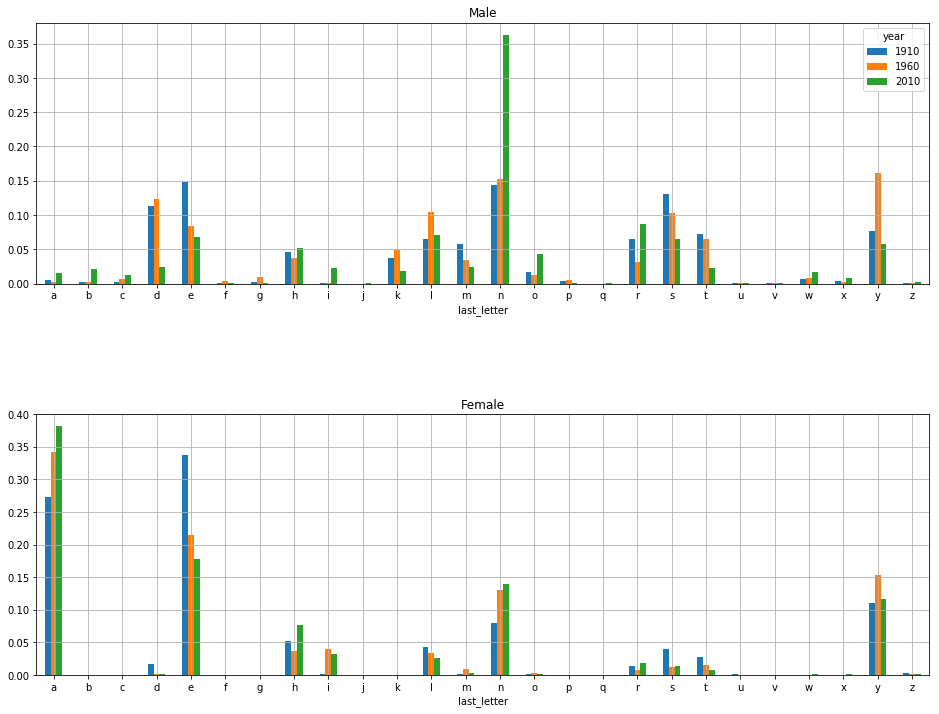

In [19]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(16, 12))

plt.subplots_adjust(hspace = 0.5 )
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male',grid=True)
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',legend=False,grid=True)


Boy names ending in n have experienced significant growth since 1960 while the proportion of girls whose last letter in their name have had gradual increase

## to plot proportion of boys born with names ending in n/d/y over time

In [20]:
letter_prop = table/table.sum()

In [21]:
dny = letter_prop.loc[['d','n','y'], 'M'].T

In [22]:
dny.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


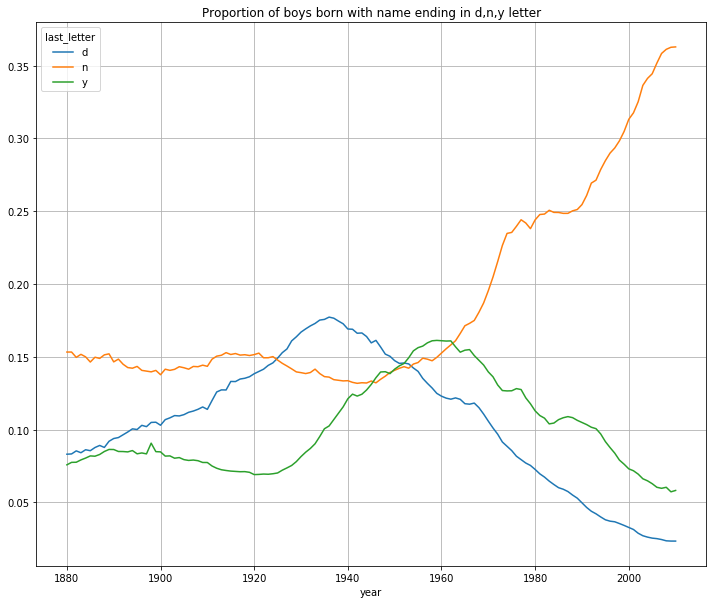

In [23]:
dny.plot(title='Proportion of boys born with name ending in d,n,y letter', grid=True, figsize=(12,10))

# USDA Food Database

In [24]:
db = json.load(open('datasets/usda_food/database.json'))

#### Each elements of db is a dict 

In [25]:
type(db[0])

dict

In [26]:
db[0]['nutrients'][0]

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [27]:
info = pd.DataFrame(db, columns=['description','group','id','manufacturer'])

#### When coverting a list of dicts into DataFrame, we can specify fields to extract

In [28]:
info.head()

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [29]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
description     6636 non-null object
group           6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [30]:
pd.value_counts(info.group)

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Beverages                            278
Soups, Sauces, and Gravies           275
Finfish and Shellfish Products       255
Baby Foods                           209
Cereal Grains and Pasta              183
Ethnic Foods                         165
Snacks                               162
Nut and Seed Products                128
Poultry Products                     116
Sausages and Luncheon Meats          111
Dairy and Egg Products               107
Fats and Oils                         97
Meals, Entrees, and Sidedishes        57
Restaurant Foods                      51
Spices and Herbs

In [31]:
nutrients = []
for rec in db:
    fnuts = pd.DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)
nutrients = pd.concat(nutrients, ignore_index=True)

In [32]:
nutrients

,description,group,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


In [33]:
col_mapping ={'description': 'nut','group': 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping,copy=False)

In [34]:
nutrients[:5]

,nut,nutgroup,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008


In [35]:
col_mapping = {'description':'food','group': 'fgroup'}
info = info.rename(columns=col_mapping,copy=False)

In [36]:
ndata = pd.merge(info,nutrients,on='id', how='outer')
ndata.info()
ndata.loc[2001]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389355 entries, 0 to 389354
Data columns (total 8 columns):
food            389355 non-null object
fgroup          389355 non-null object
id              389355 non-null int64
manufacturer    305162 non-null object
nut             389355 non-null object
nutgroup        389355 non-null object
units           389355 non-null object
value           389355 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 26.7+ MB


food                   Cream, fluid, half and half
fgroup                      Dairy and Egg Products
id                                            1049
manufacturer                                      
nut             Fatty acids, total monounsaturated
nutgroup                                     Other
units                                            g
value                                        3.321
Name: 2001, dtype: object

In [37]:
ndata[:10]

,food,fgroup,id,manufacturer,nut,nutgroup,units,value
0,"Cheese, caraway",Dairy and Egg Products,1008,,Protein,Composition,g,25.18
1,"Cheese, caraway",Dairy and Egg Products,1008,,Total lipid (fat),Composition,g,29.20
2,"Cheese, caraway",Dairy and Egg Products,1008,,"Carbohydrate, by difference",Composition,g,3.06
3,"Cheese, caraway",Dairy and Egg Products,1008,,Ash,Other,g,3.28
4,"Cheese, caraway",Dairy and Egg Products,1008,,Energy,Energy,kcal,376.00
5,"Cheese, caraway",Dairy and Egg Products,1008,,Water,Composition,g,39.28
6,"Cheese, caraway",Dairy and Egg Products,1008,,Energy,Energy,kJ,1573.00
7,"Cheese, caraway",Dairy and Egg Products,1008,,"Fiber, total dietary",Composition,g,0.00
8,"Cheese, caraway",Dairy and Egg Products,1008,,"Calcium, Ca",Elements,mg,673.00
9,"Cheese, caraway",Dairy and Egg Products,1008,,"Iron, Fe",Elements,mg,0.64


# US Presidential Campaign

In [38]:
fec = pd.read_csv('datasets/fec/P00000001-ALL.csv')

/Users/hunghoang/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [39]:
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


#### List of candidates

In [40]:
fec.cand_nm.unique()

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [41]:
(fec.contb_receipt_amt<0).value_counts()

False    992084
True       9647
Name: contb_receipt_amt, dtype: int64

#### Data preparation: get rid of rows whose contb_receipt_amt value is negative

In [42]:
fec = fec[fec.contb_receipt_amt>0]

#### Since Barack Obama and Mitt Romney were the main two candidates, I’ll also prepare a subset that just has contributions to their campaigns:

In [43]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack','Romney, Mitt'])]

### Donation Statistics by Occupation and Employer


#### Total donations by occupation

In [44]:
pd.options.display.max_rows
fec.contbr_occupation.value_counts()[:20]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
NOT EMPLOYED                                9828
SALES                                       8333
LAWYER                                      8283
MANAGER                                     8024
PRESIDENT                                   7758
STUDENT                                     7071
OWNER                                       6343
EXECUTIVE                                   5506
SELF-EMPLOYED                               5472
WRITER                                      5128
Name: contbr_occupat

In [45]:
occ_mapping={
    'INFORMATION REQUESTED': 'NOT PROVIDED', 
    'INFORMATION REQUESTED PER BEST EFFORTS': 'NOT PROVIDED'
}
f = lambda x: occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)


In [46]:
#fec.contbr_employer.value_counts()[:1000]

In [47]:
emp_mapping = {
    'NOT EMPLOYED': 'UNEMPLOYED',
    'SELF EMPLOYED': 'SELF-EMPLOYED',
    'SELF': 'SELF-EMPLOYED',
    'INFORMATION REQUESTED': 'NOT PROVIDED',
    'INFORMATION REQUESTED PER BEST EFFORTS': 'NOT PROVIDED',
    'REQUESTED': 'NOT PROVIDED',
    'REFUSED': 'NOT PROVIDED'    
}
f = lambda x: emp_mapping.get(x,x)
fec.contbr_employer = fec.contbr_employer.map(f)

In [48]:
#fec.contbr_employer.value_counts()[:1000]

In [55]:
by_occupation =fec_mrbo.pivot_table('contb_receipt_amt',index='contbr_occupation',columns='cand_nm' ,aggfunc='sum')
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]

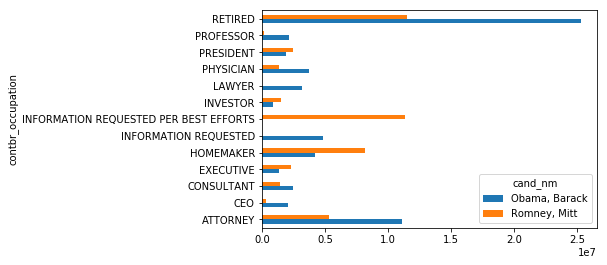

In [56]:
over_2mm.plot(kind='barh')

In [54]:
fec_mrbo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 694282 entries, 411 to 701385
Data columns (total 16 columns):
cmte_id              694282 non-null object
cand_id              694282 non-null object
cand_nm              694282 non-null object
contbr_nm            694282 non-null object
contbr_city          694275 non-null object
contbr_st            694278 non-null object
contbr_zip           694234 non-null object
contbr_employer      693607 non-null object
contbr_occupation    693524 non-null object
contb_receipt_amt    694282 non-null float64
contb_receipt_dt     694282 non-null object
receipt_desc         2345 non-null object
memo_cd              87387 non-null object
memo_text            90672 non-null object
form_tp              694282 non-null object
file_num             694282 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 90.0+ MB
